# FordGo Bike Data Visualization and Analysis
## by Sualeh Alam

## Investigation Overview

> In this presentation, I will compare the different type of Customers and will extract valuable insights on how the customers used the Bike System by taking into consideration their 
1. Age
2. Gender
3. Trip Duration (in months, days, hours, minutes)


## Dataset Overview

> The FordGo Bike Dataset includes information about a bike-sharing system. Multiple data files will be joined together to get  a full year’s coverage. The features included in the dataset : Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , Trip Duration (seconds), End Station ID , End Station Name, End Station Latitude , End Station Longitude, Bike ID ,Member Year of Birth, Member Year of Birth, Member Gender (Male, Female, Other), User Type (Subscriber or Customer.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('clean_master_file.csv')

## Age Comparison of different Genders.

> FordGo Bike system basically has 3 Genders. 
 1. Male
 2. Female
 3. Others
 
In this visualization we see there are **88.6%** *Subscriber* users, and only **11.4%** *Customer* users.

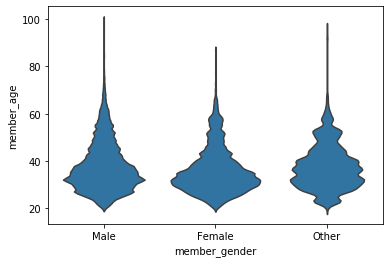

In [4]:
sns.violinplot(data = df_clean, x = 'member_gender',y='member_age',color = sns.color_palette()[0],inner=None);

## Average Trip Duration (in minutes) of Different User Groups

> 1. Males tend to use the bike service most frequently, especially the **older ones.**
2. **Young females (25-35 years)** tend to use bikes more frequently as compared to males, and others

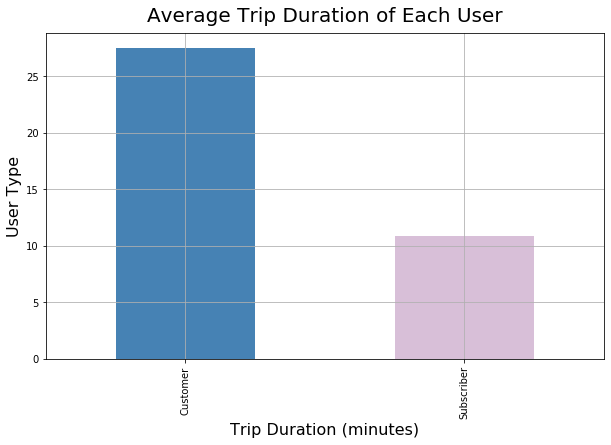

In [6]:
colors=['steelblue', 'thistle']
axis = df_clean.groupby('user_type')['duration_min'].mean().plot(kind='bar', color=colors, figsize=(10,6))
axis.set_title('Average Trip Duration of Each User', fontsize=20, y=1.015)
axis.set_ylabel('User Type',  fontsize=16)
axis.grid()         # To add gridlines
axis.set_xlabel('Trip Duration (minutes)', fontsize=16);

## Duration of Trip (in minutes) of Different Genders and Different Users 

> Based on the heatmap below, we can clearly see the duration of trip (in minutes) of different types of Users (Customers and Subscribers) with different genders (Male, Female, and Others).
- In Customer group the least trip duration (in minutes) is of Males i.e **25.735**, which is quite surprising.
- In Subscriber group also, the least trip duration (in minutes) is of Male i.e **10.349**.
- Overall, females have the highest trip duration (in minutes) that is **31.280** in both groups.


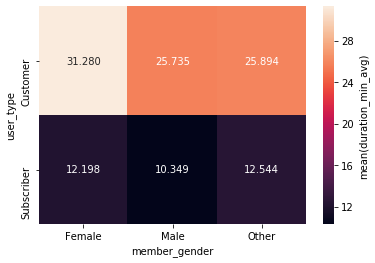

In [7]:
mean_gender_duration = df_clean.groupby(['member_gender', 'user_type']).mean()['duration_min']
mean_gender_duration = mean_gender_duration.reset_index(name = 'duration_min_avg')
mean_gender_duration = mean_gender_duration.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'duration_min_avg')

sns.heatmap(mean_gender_duration, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min_avg)'});

## Summary
> FortGo Rent a bike system is an incredible idea which is healthy and environmental friendly. It could be used for both pleasure and business. There are basically two types of users in this system, Subscribers and Customers. Subscribers tend to use the Bike system more frequently on business days ( to go to work and return from work ), while the Customers use it on weekends (Saturday, Sunday) and mainly as an outdoor activity and for fun, leisure purposes. That's why their trip durations are **much higher (27 minutes)**, while Subscribers have a **much lower (11 minutes)** trip duration. Overall in these both types of users, **Females** have the highest trip duration in minutes, which is **31.280**. 